In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from google.colab import drive
import os

#------------------Must change this Drive file direction----------
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/connectome')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"current work direction: {os.getcwd()} Current device: {device}")
pd.set_option('display.max_rows',    None)
pd.set_option('display.max_columns', None)

Mounted at /content/drive
현재 작업 디렉토리: /content/drive/MyDrive/Colab Notebooks/connectome 현재 디바이스: cpu


Epochs:   1%|          | 1/100 [00:03<05:22,  3.26s/it]

Epoch 01/100  Train Loss: 5.5344, Acc: 0.5000%  


Epochs:   2%|▏         | 2/100 [00:05<04:18,  2.64s/it]

Epoch 02/100  Train Loss: 5.4391, Acc: 0.3000%  


Epochs:   3%|▎         | 3/100 [00:07<04:08,  2.56s/it]

Epoch 03/100  Train Loss: 5.4017, Acc: 0.8000%  


Epochs:   4%|▍         | 4/100 [00:10<03:49,  2.39s/it]

Epoch 04/100  Train Loss: 5.3850, Acc: 1.2000%  


Epochs:   5%|▌         | 5/100 [00:12<03:43,  2.36s/it]

Epoch 05/100  Train Loss: 5.3693, Acc: 2.0000%  


Epochs:   6%|▌         | 6/100 [00:15<03:54,  2.49s/it]

Epoch 06/100  Train Loss: 5.3567, Acc: 1.8000%  


Epochs:   7%|▋         | 7/100 [00:17<04:00,  2.59s/it]

Epoch 07/100  Train Loss: 5.3457, Acc: 1.1000%  


Epochs:   8%|▊         | 8/100 [00:20<03:49,  2.49s/it]

Epoch 08/100  Train Loss: 5.3337, Acc: 1.4000%  


Epochs:   9%|▉         | 9/100 [00:22<03:32,  2.34s/it]

Epoch 09/100  Train Loss: 5.3184, Acc: 2.6000%  


Epochs:  10%|█         | 10/100 [00:24<03:30,  2.33s/it]

Epoch 10/100  Train Loss: 5.3024, Acc: 3.5000%  


Epochs:  11%|█         | 11/100 [00:26<03:25,  2.30s/it]

Epoch 11/100  Train Loss: 5.2894, Acc: 5.2000%  


Epochs:  12%|█▏        | 12/100 [00:29<03:33,  2.43s/it]

Epoch 12/100  Train Loss: 5.2718, Acc: 4.7000%  


Epochs:  13%|█▎        | 13/100 [00:32<03:46,  2.61s/it]

Epoch 13/100  Train Loss: 5.2594, Acc: 3.0000%  


Epochs:  14%|█▍        | 14/100 [00:34<03:40,  2.56s/it]

Epoch 14/100  Train Loss: 5.2400, Acc: 4.2000%  


Epochs:  15%|█▌        | 15/100 [00:37<03:29,  2.47s/it]

Epoch 15/100  Train Loss: 5.2188, Acc: 5.7000%  


Epochs:  16%|█▌        | 16/100 [00:39<03:15,  2.32s/it]

Epoch 16/100  Train Loss: 5.1988, Acc: 5.8000%  


Epochs:  17%|█▋        | 17/100 [00:41<03:15,  2.35s/it]

Epoch 17/100  Train Loss: 5.1767, Acc: 6.6000%  


Epochs:  18%|█▊        | 18/100 [00:44<03:36,  2.64s/it]

Epoch 18/100  Train Loss: 5.1543, Acc: 6.6000%  


Epochs:  19%|█▉        | 19/100 [00:47<03:40,  2.72s/it]

Epoch 19/100  Train Loss: 5.1280, Acc: 7.1000%  


Epochs:  20%|██        | 20/100 [00:50<03:37,  2.71s/it]

Epoch 20/100  Train Loss: 5.1036, Acc: 9.9000%  


Epochs:  21%|██        | 21/100 [00:52<03:18,  2.51s/it]

Epoch 21/100  Train Loss: 5.0743, Acc: 9.6000%  


Epochs:  22%|██▏       | 22/100 [00:54<03:09,  2.43s/it]

Epoch 22/100  Train Loss: 5.0449, Acc: 10.8000%  


Epochs:  23%|██▎       | 23/100 [00:57<03:09,  2.46s/it]

Epoch 23/100  Train Loss: 5.0111, Acc: 15.6000%  


Epochs:  24%|██▍       | 24/100 [01:02<04:14,  3.35s/it]

Epoch 24/100  Train Loss: 4.9744, Acc: 16.1000%  


Epochs:  25%|██▌       | 25/100 [01:06<04:20,  3.48s/it]

Epoch 25/100  Train Loss: 4.9393, Acc: 14.9000%  


Epochs:  26%|██▌       | 26/100 [01:08<03:46,  3.06s/it]

Epoch 26/100  Train Loss: 4.9003, Acc: 18.0000%  


Epochs:  27%|██▋       | 27/100 [01:10<03:27,  2.84s/it]

Epoch 27/100  Train Loss: 4.8552, Acc: 19.8000%  


Epochs:  28%|██▊       | 28/100 [01:15<04:00,  3.34s/it]

Epoch 28/100  Train Loss: 4.8073, Acc: 22.9000%  


Epochs:  29%|██▉       | 29/100 [01:19<04:06,  3.48s/it]

Epoch 29/100  Train Loss: 4.7626, Acc: 26.5000%  


Epochs:  30%|███       | 30/100 [01:22<04:05,  3.51s/it]

Epoch 30/100  Train Loss: 4.7117, Acc: 29.8000%  


Epochs:  31%|███       | 31/100 [01:26<04:03,  3.53s/it]

Epoch 31/100  Train Loss: 4.6578, Acc: 28.7000%  


Epochs:  32%|███▏      | 32/100 [01:29<03:51,  3.41s/it]

Epoch 32/100  Train Loss: 4.6030, Acc: 32.3000%  


Epochs:  33%|███▎      | 33/100 [01:32<03:43,  3.33s/it]

Epoch 33/100  Train Loss: 4.5413, Acc: 34.6000%  


Epochs:  34%|███▍      | 34/100 [01:35<03:32,  3.21s/it]

Epoch 34/100  Train Loss: 4.4779, Acc: 36.6000%  


Epochs:  35%|███▌      | 35/100 [01:38<03:24,  3.15s/it]

Epoch 35/100  Train Loss: 4.4134, Acc: 40.0000%  


Epochs:  36%|███▌      | 36/100 [01:43<03:49,  3.59s/it]

Epoch 36/100  Train Loss: 4.3429, Acc: 41.6000%  


Epochs:  37%|███▋      | 37/100 [01:46<03:42,  3.54s/it]

Epoch 37/100  Train Loss: 4.2716, Acc: 46.1000%  


Epochs:  38%|███▊      | 38/100 [01:49<03:29,  3.38s/it]

Epoch 38/100  Train Loss: 4.1912, Acc: 47.6000%  


Epochs:  39%|███▉      | 39/100 [01:52<03:19,  3.27s/it]

Epoch 39/100  Train Loss: 4.1130, Acc: 49.5000%  


Epochs:  40%|████      | 40/100 [01:56<03:19,  3.32s/it]

Epoch 40/100  Train Loss: 4.0331, Acc: 50.3000%  


Epochs:  41%|████      | 41/100 [02:00<03:38,  3.70s/it]

Epoch 41/100  Train Loss: 3.9450, Acc: 53.0000%  


Epochs:  42%|████▏     | 42/100 [02:03<03:15,  3.37s/it]

Epoch 42/100  Train Loss: 3.8569, Acc: 55.0000%  


Epochs:  43%|████▎     | 43/100 [02:06<03:03,  3.22s/it]

Epoch 43/100  Train Loss: 3.7657, Acc: 58.2000%  


Epochs:  44%|████▍     | 44/100 [02:08<02:51,  3.07s/it]

Epoch 44/100  Train Loss: 3.6695, Acc: 59.1000%  


Epochs:  45%|████▌     | 45/100 [02:11<02:41,  2.93s/it]

Epoch 45/100  Train Loss: 3.5710, Acc: 62.2000%  


Epochs:  46%|████▌     | 46/100 [02:14<02:41,  2.99s/it]

Epoch 46/100  Train Loss: 3.4717, Acc: 65.2000%  


Epochs:  47%|████▋     | 47/100 [02:16<02:26,  2.77s/it]

Epoch 47/100  Train Loss: 3.3669, Acc: 67.4000%  


Epochs:  48%|████▊     | 48/100 [02:18<02:14,  2.58s/it]

Epoch 48/100  Train Loss: 3.2650, Acc: 69.7000%  


Epochs:  49%|████▉     | 49/100 [02:21<02:08,  2.52s/it]

Epoch 49/100  Train Loss: 3.1521, Acc: 71.9000%  


Epochs:  50%|█████     | 50/100 [02:24<02:07,  2.55s/it]

Epoch 50/100  Train Loss: 3.0492, Acc: 72.5000%  


Epochs:  51%|█████     | 51/100 [02:29<02:44,  3.35s/it]

Epoch 51/100  Train Loss: 2.9345, Acc: 75.7000%  


Epochs:  52%|█████▏    | 52/100 [02:32<02:41,  3.36s/it]

Epoch 52/100  Train Loss: 2.8287, Acc: 78.6000%  


Epochs:  53%|█████▎    | 53/100 [02:34<02:21,  3.02s/it]

Epoch 53/100  Train Loss: 2.7152, Acc: 82.4000%  


Epochs:  54%|█████▍    | 54/100 [02:37<02:07,  2.78s/it]

Epoch 54/100  Train Loss: 2.6043, Acc: 85.1000%  


Epochs:  55%|█████▌    | 55/100 [02:39<01:59,  2.65s/it]

Epoch 55/100  Train Loss: 2.4934, Acc: 85.5000%  


Epochs:  56%|█████▌    | 56/100 [02:44<02:25,  3.31s/it]

Epoch 56/100  Train Loss: 2.3827, Acc: 88.6000%  


Epochs:  57%|█████▋    | 57/100 [02:46<02:12,  3.08s/it]

Epoch 57/100  Train Loss: 2.2751, Acc: 90.5000%  


Epochs:  58%|█████▊    | 58/100 [02:49<02:07,  3.04s/it]

Epoch 58/100  Train Loss: 2.1676, Acc: 91.7000%  


Epochs:  59%|█████▉    | 59/100 [02:52<01:56,  2.84s/it]

Epoch 59/100  Train Loss: 2.0569, Acc: 92.3000%  


Epochs:  60%|██████    | 60/100 [02:55<01:56,  2.92s/it]

Epoch 60/100  Train Loss: 1.9557, Acc: 93.1000%  


Epochs:  61%|██████    | 61/100 [02:58<01:59,  3.08s/it]

Epoch 61/100  Train Loss: 1.8533, Acc: 94.0000%  


Epochs:  62%|██████▏   | 62/100 [03:01<01:52,  2.95s/it]

Epoch 62/100  Train Loss: 1.7522, Acc: 95.9000%  


Epochs:  63%|██████▎   | 63/100 [03:03<01:43,  2.79s/it]

Epoch 63/100  Train Loss: 1.6563, Acc: 96.9000%  


Epochs:  64%|██████▍   | 64/100 [03:06<01:35,  2.65s/it]

Epoch 64/100  Train Loss: 1.5589, Acc: 96.7000%  


Epochs:  65%|██████▌   | 65/100 [03:08<01:27,  2.50s/it]

Epoch 65/100  Train Loss: 1.4706, Acc: 98.2000%  


Epochs:  66%|██████▌   | 66/100 [03:11<01:29,  2.63s/it]

Epoch 66/100  Train Loss: 1.3878, Acc: 98.5000%  


Epochs:  67%|██████▋   | 67/100 [03:13<01:27,  2.66s/it]

Epoch 67/100  Train Loss: 1.3026, Acc: 98.4000%  


Epochs:  68%|██████▊   | 68/100 [03:16<01:21,  2.55s/it]

Epoch 68/100  Train Loss: 1.2259, Acc: 98.5000%  


Epochs:  69%|██████▉   | 69/100 [03:18<01:16,  2.47s/it]

Epoch 69/100  Train Loss: 1.1477, Acc: 99.1000%  


Epochs:  70%|███████   | 70/100 [03:20<01:12,  2.42s/it]

Epoch 70/100  Train Loss: 1.0762, Acc: 99.4000%  


Epochs:  71%|███████   | 71/100 [03:22<01:08,  2.35s/it]

Epoch 71/100  Train Loss: 1.0123, Acc: 99.4000%  


Epochs:  72%|███████▏  | 72/100 [03:26<01:12,  2.60s/it]

Epoch 72/100  Train Loss: 0.9453, Acc: 99.6000%  


Epochs:  73%|███████▎  | 73/100 [03:29<01:12,  2.69s/it]

Epoch 73/100  Train Loss: 0.8897, Acc: 99.7000%  


Epochs:  74%|███████▍  | 74/100 [03:31<01:07,  2.59s/it]

Epoch 74/100  Train Loss: 0.8324, Acc: 99.9000%  


Epochs:  75%|███████▌  | 75/100 [03:33<01:02,  2.50s/it]

Epoch 75/100  Train Loss: 0.7785, Acc: 99.9000%  


Epochs:  76%|███████▌  | 76/100 [03:36<01:00,  2.52s/it]

Epoch 76/100  Train Loss: 0.7288, Acc: 99.9000%  


Epochs:  77%|███████▋  | 77/100 [03:41<01:17,  3.38s/it]

Epoch 77/100  Train Loss: 0.6826, Acc: 99.9000%  


Epochs:  78%|███████▊  | 78/100 [03:47<01:30,  4.09s/it]

Epoch 78/100  Train Loss: 0.6382, Acc: 99.9000%  


Epochs:  79%|███████▉  | 79/100 [03:52<01:34,  4.52s/it]

Epoch 79/100  Train Loss: 0.5999, Acc: 100.0000%  


Epochs:  80%|████████  | 80/100 [03:57<01:29,  4.47s/it]

Epoch 80/100  Train Loss: 0.5616, Acc: 99.9000%  


Epochs:  81%|████████  | 81/100 [04:00<01:15,  4.00s/it]

Epoch 81/100  Train Loss: 0.5273, Acc: 100.0000%  


Epochs:  82%|████████▏ | 82/100 [04:02<01:05,  3.66s/it]

Epoch 82/100  Train Loss: 0.4956, Acc: 100.0000%  


Epochs:  83%|████████▎ | 83/100 [04:05<00:58,  3.45s/it]

Epoch 83/100  Train Loss: 0.4629, Acc: 100.0000%  


Epochs:  84%|████████▍ | 84/100 [04:09<00:55,  3.45s/it]

Epoch 84/100  Train Loss: 0.4372, Acc: 100.0000%  


Epochs:  85%|████████▌ | 85/100 [04:12<00:52,  3.48s/it]

Epoch 85/100  Train Loss: 0.4103, Acc: 100.0000%  


Epochs:  86%|████████▌ | 86/100 [04:15<00:46,  3.33s/it]

Epoch 86/100  Train Loss: 0.3859, Acc: 100.0000%  


Epochs:  87%|████████▋ | 87/100 [04:19<00:42,  3.29s/it]

Epoch 87/100  Train Loss: 0.3643, Acc: 100.0000%  


Epochs:  88%|████████▊ | 88/100 [04:22<00:39,  3.33s/it]

Epoch 88/100  Train Loss: 0.3438, Acc: 100.0000%  


Epochs:  89%|████████▉ | 89/100 [04:26<00:38,  3.52s/it]

Epoch 89/100  Train Loss: 0.3254, Acc: 100.0000%  


Epochs:  90%|█████████ | 90/100 [04:29<00:34,  3.44s/it]

Epoch 90/100  Train Loss: 0.3064, Acc: 100.0000%  


Epochs:  91%|█████████ | 91/100 [04:32<00:30,  3.35s/it]

Epoch 91/100  Train Loss: 0.2907, Acc: 100.0000%  


Epochs:  92%|█████████▏| 92/100 [04:36<00:27,  3.43s/it]

Epoch 92/100  Train Loss: 0.2746, Acc: 100.0000%  


Epochs:  93%|█████████▎| 93/100 [04:40<00:25,  3.68s/it]

Epoch 93/100  Train Loss: 0.2598, Acc: 100.0000%  


Epochs:  94%|█████████▍| 94/100 [04:44<00:22,  3.74s/it]

Epoch 94/100  Train Loss: 0.2473, Acc: 100.0000%  


Epochs:  95%|█████████▌| 95/100 [04:48<00:19,  3.89s/it]

Epoch 95/100  Train Loss: 0.2339, Acc: 100.0000%  


Epochs:  96%|█████████▌| 96/100 [04:54<00:17,  4.46s/it]

Epoch 96/100  Train Loss: 0.2226, Acc: 100.0000%  


Epochs:  97%|█████████▋| 97/100 [05:00<00:14,  4.73s/it]

Epoch 97/100  Train Loss: 0.2120, Acc: 100.0000%  


Epochs:  98%|█████████▊| 98/100 [05:05<00:10,  5.09s/it]

Epoch 98/100  Train Loss: 0.2025, Acc: 100.0000%  


Epochs:  99%|█████████▉| 99/100 [05:11<00:05,  5.35s/it]

Epoch 99/100  Train Loss: 0.1926, Acc: 100.0000%  


Epochs: 100%|██████████| 100/100 [05:17<00:00,  3.18s/it]

Epoch 100/100  Train Loss: 0.1832, Acc: 100.0000%  
Test set accuracy: 99.0000%


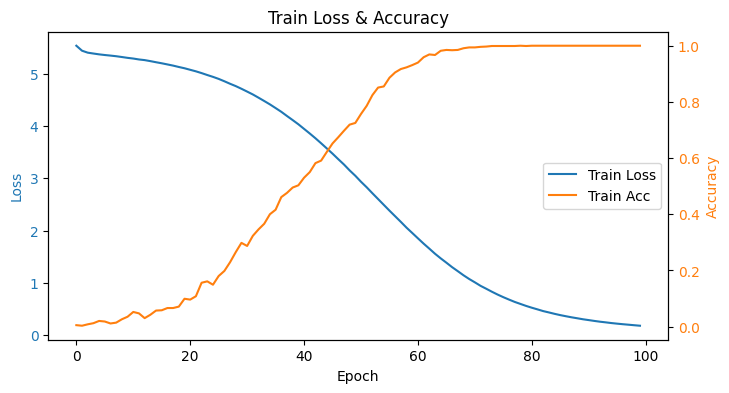

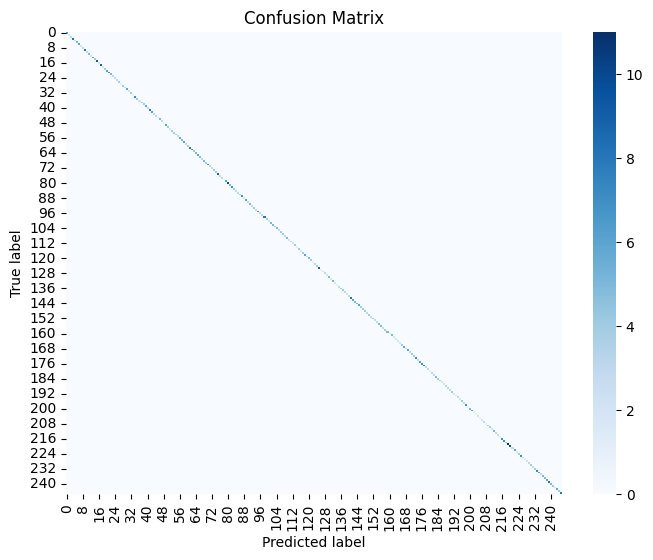

In [3]:
#------------Import Data---------------
csv_path_cnt= ('Connectome.csv')
cntset = pd.read_csv(csv_path_cnt)
csv_path_ann= ('DoOR.csv')
X_ann = pd.read_csv(csv_path_ann)

ff=cntset[cntset["directionality"]=='feedforward']
otp=ff[(ff["pre_class"]=='ORN') & (ff["post_class"]=='ALPN')]
ptk=ff[(ff['pre_class']=='ALPN') & (ff['post_class']=='KC')]

#-----------ORN to ALPN mask: 'mask_otp'-----------------
otp_unique = otp[['pre_root_id','post_root_id']]
mask_otp_norm = pd.crosstab(
    index=otp_unique['pre_root_id'],    # Row: ORN ID
    columns=otp_unique['post_root_id']  # Column: ALPN ID
    , values=otp['syn_count']           # syn count
    , aggfunc='sum'
    ).fillna(0)                         #NaN = 0

mask_otp = torch.from_numpy(mask_otp_norm.T.values).float().to(device)  # (615, 2278)

#------------ALPN to KC mask: 'mask_ptk'-----------------
alpn_ids=mask_otp_norm.columns

ptk_unique=ptk[['pre_root_id', 'post_root_id']]
mask_ptk_norm = (
    pd.crosstab(
        index=ptk_unique['pre_root_id'],    # Row: ALPN ID
        columns=ptk_unique['post_root_id'], # Column: KC ID
        values=ptk['syn_count'],
        aggfunc='sum'
    )
    .reindex(index=alpn_ids,   # Make ALPN ID 615
             fill_value=0)
    .fillna(0)                 # NaN = 0
)
mask_ptk = torch.from_numpy(mask_ptk_norm.T.values).float().to(device)  # (4907,334)

#-----------Normalization by He: 'mask_otp_n' & 'mask_ptk_n'------
def synapse_he_init(msk):

    syn_np = msk.cpu().numpy() if hasattr(msk, 'cpu') else msk
    fan_in = syn_np.shape[1]
    device = msk.device if hasattr(msk, 'device') else torch.device('cpu')

    S = torch.from_numpy(syn_np).float().to(device)

    sign = torch.sign(S)
    mag  = torch.abs(S)

    # positive/negative each
    e_mask = sign > 0
    i_mask = sign < 0
    if e_mask.any():
        block = mag[e_mask]
        mag[e_mask] = (block - block.mean()) / (block.std(unbiased=False) + 1e-6)
    if i_mask.any():
        block = mag[i_mask]
        mag[i_mask] = (block - block.mean()) / (block.std(unbiased=False) + 1e-6)

    # 5) He Initialization
    sigma_target = math.sqrt(2.0 / fan_in)

    W0 = sign * mag * sigma_target
    return W0

mask_otp_n = synapse_he_init(mask_otp).to(device)  # (615,2278)
mask_ptk_n = synapse_he_init(mask_ptk).to(device)  # (4907,615)

#-----------------------MaskedLinear()----------------------------
class MaskedLinear(nn.Module):
    def __init__(self, in_features, out_features, weight):
        super().__init__()
        self.weight = nn.Parameter(weight)
        self.bias   = nn.Parameter(torch.zeros(out_features))

        self.register_buffer('mask', torch.sign(weight).float())

    def forward(self, x):

        w = torch.abs(self.weight) * self.mask
        # Use functional linear transformation
        return torch.nn.functional.linear(x, w, self.bias)

#---------------------Odor Classifier()---------------------------
class Odor_classifier(nn.Module):
  def __init__(self,input_dim,output_dim, mask1, mask2):
    super().__init__()
    self.net=nn.Sequential(
        MaskedLinear(input_dim,615, mask1),
        nn.ReLU(),
        MaskedLinear(615,4907, mask2),
        nn.ReLU(),
        nn.Linear(4907,output_dim)
    )
  def forward(self, x):
    return self.net(x)

model = Odor_classifier(input_dim=2278, output_dim=250, mask1=mask_otp_n, mask2=mask_ptk_n).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

#-----------------------Train & Test----------------------
cls_labels = []
for i in range(250):
  cls_labels.append(f'Odor_({i+1})')

le=LabelEncoder()
y_int=le.fit_transform(cls_labels)
y = y_int
y_out=torch.tensor(y,dtype=torch.long)
#prototype Random input
xp = torch.rand(250,53,dtype=torch.float32)

x_train=[]
y_train=[]
x_test=[]
y_test=[]

idx=torch.randint(0,250,(1000,))

for n in idx:
  noise=torch.normal(mean=0,std=0.2,size=(43,53))

  xi=xp[n]
  xn  = torch.zeros(43,53, dtype=torch.float32)
  xn=(xi+noise).flatten()

  xn=xn[1:]

  x_train.append(xn)
  y_train.append(y_out[n]) # Append the individual element y_out[n]

idx=torch.randint(0,250,(200,))

for k in idx:
  noise=torch.normal(mean=0,std=0.2,size=(43,53))

  xi=xp[k]
  xn  = torch.zeros(43,53, dtype=torch.float32)
  xn=(xi+noise).flatten()

  xn=xn[1:]

  x_test.append(xn)
  y_test.append(y_out[k]) # Append the individual element y_out[k]

x_train = torch.stack(x_train).to(dtype=torch.float32)
y_train = torch.stack(y_train).to(dtype=torch.long)
x_test = torch.stack(x_test).to(dtype=torch.float32)
y_test = torch.stack(y_test).to(dtype=torch.long)

train_ds = TensorDataset(x_train, y_train)
test_ds  = TensorDataset(x_test,  y_test)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)

#---------------Train loop----------------

num_epochs = 100
train_losses, train_accs = [], []

for epoch in trange(num_epochs, desc="Epochs"):
    model.train()
    tr_loss = tr_acc = 0.0
    y_true = []
    y_pred = []
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss   = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        tr_loss += loss.item() * xb.size(0)
        tr_acc  += (logits.argmax(dim=1) == yb).float().sum().item()

        # for confusion matrix
        y_true.append(yb.cpu())
        y_pred.append(logits.argmax(dim=1).cpu())

    tr_loss /= len(train_loader.dataset)
    tr_acc  /= len(train_loader.dataset)
    train_losses.append(tr_loss)
    train_accs.append(tr_acc)

    print(f"Epoch {epoch+1:02d}/{num_epochs}  "
          f"Train Loss: {tr_loss:.4f}, Acc: {tr_acc:.4%}  ")


#------------Test Accuracy---------
model.eval()
te_correct = 0
total_samples = 0
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb)
        te_correct += (logits.argmax(dim=1) == yb).float().sum().item()
        total_samples += xb.size(0)
test_acc = te_correct / total_samples
print(f"Test set accuracy: {test_acc:.4%}")


#---------Train result plot---------
fig, ax1 = plt.subplots(figsize=(8, 4))
# Loss: 왼쪽 y축
ax1.plot(train_losses, color='tab:blue', label='Train Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# Accuracy: 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(train_accs, color='tab:orange', label='Train Acc')
ax2.set_ylabel('Accuracy', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center right')

plt.title('Train Loss & Accuracy')
plt.show()


# ---------Confusion_matrix---------
y_true_all = torch.cat(y_true).numpy()
y_pred_all = torch.cat(y_pred).numpy()

cm = confusion_matrix(y_true_all, y_pred_all)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()